# K-means Clustering
我们将实施和应用K-means到一个简单的二维数据集，以获得一些直观的工作原理。 K-means是一个迭代的，无监督的聚类算法，将类似的实例组合成簇。 该算法通过猜测每个簇的初始聚类中心开始，然后重复将实例分配给最近的簇，并重新计算该簇的聚类中心。 我们要实现的第一部分是找到数据中每个实例最接近的聚类中心的函数。



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
## 加载数据
data = loadmat('data/ex7data2')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
X = data['X']

In [4]:
X.shape

(300, 2)

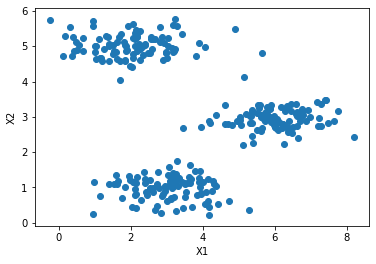

In [5]:
## 数据可视化
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## 簇分配 Find closest centroids
在K-means算法的分配簇的阶段，算法将每一个训练样本分配给最接近的簇中心。
![](https://img.arctee.cn/202121260907-e.png)

In [6]:
# 为每个样本分配到最近的簇
def findClosestCentroids(X, centroids):
    m = len(X)
    idx = np.zeros(m)
    for i in range(m):
        dist = np.sum((X[i,:] - centroids) ** 2, axis=1)
        idx[i] = np.argmin(dist)
    return idx

In [7]:
# 测试下
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = findClosestCentroids(X, initial_centroids)
idx[:3]

array([0., 2., 1.])

## 簇移动 Computing centroid means
分配好每个点对应的簇中心，接下来要做的是，重新计算每个簇中心，为这个簇里面所有点位置的平均值。
![](https://img.arctee.cn/202121260959-7.png)

In [8]:
np.unique(idx)

array([0., 1., 2.])

In [9]:
# 计算每个簇的中心
def computeCentroids(X, idx):
    k = len(np.unique(idx)) # 簇的个数
    centroids = []
    for i in range(k):
        u_k = X[idx==i].mean(axis=0) # 求每列的均值
        centroids.append(u_k)
    return np.array(centroids)


In [10]:
computeCentroids(X, idx)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

# K-means on example dataset

## 绘制簇分布图

In [11]:
# 仅绘制最后一次的结果
def plotCentroids(X, centriods):
    # 建立DataFrame数据结构，存储X及其对应的簇类别
    idx = findClosestCentroids(X, centriods)
    data = pd.DataFrame(X, columns=['X1', 'X2'])
    data['idx'] = idx
    
    # 绘制所有样本数据，不同簇不同颜色
    plt.scatter(data['X1'], data['X2'], c=data['idx'])
    
    # 绘制簇中心点
    plt.scatter(centroids[:,0], centroids[:,1], c='r', marker='x')
    
    plt.show()

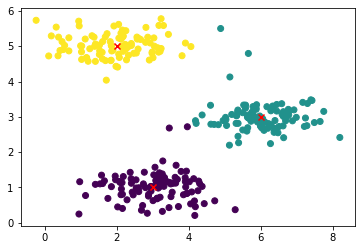

In [12]:
# 检验
centroids = np.array([[3,1], [6,3], [2,5]])
plotCentroids(X, centroids)

以上只能绘制出最后的簇中心点，无法绘制出簇中心点的变化情况  
故以下采用一种改进方式绘制

## 运行 K-means
保留每次的中心点和样本最后一次的idx，为了后续制图准备数据

In [13]:
def runKmeans(X, init_centroids, iters):
    """
    X：样本数据
    init_centriods：初始化的中心点
    iters：迭代次数
    """
    all_centroids = [] # 用来存储每次的中心点
    
    centroids_i = init_centroids
    for i in range(iters):
        idx = findClosestCentroids(X, centroids_i)
        centroids_i = computeCentroids(X, idx)
        all_centroids.append(centroids_i)
    
    return idx, all_centroids

In [14]:
initial_centroids = initial_centroids
id, al_centroids = runKmeans(X, initial_centroids, 5)

In [15]:
id

array([0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 1., 2.

In [16]:
len(np.unique(id))

3

由此可见，即时运行一次，也有3个分类，只不过其中一个类别的样本数极少

---------------------------绘图测试终-----------------------------------

In [17]:
al_centroids # aL_centroids 是一个list，里面装有每次生成的array,且每个array是3x2

[array([[2.42830111, 3.15792418],
        [5.81350331, 2.63365645],
        [7.11938687, 3.6166844 ]]),
 array([[2.31325526, 3.22830617],
        [5.33273768, 2.43159599],
        [6.8653618 , 3.23293995]]),
 array([[2.19692479, 3.42136707],
        [4.83555397, 2.12976745],
        [6.6560054 , 3.0751355 ]]),
 array([[1.98241171, 4.0250785 ],
        [3.91150763, 1.47060546],
        [6.34008592, 3.05366642]]),
 array([[1.95399466, 5.02557006],
        [3.12663743, 1.1121712 ],
        [6.12919526, 3.01606258]])]

In [18]:
xx ,yy = [], []
for cen in al_centroids:
    xx.append(cen[:, 0])
    yy.append(cen[:, 1])

xx, yy 

([array([2.42830111, 5.81350331, 7.11938687]),
  array([2.31325526, 5.33273768, 6.8653618 ]),
  array([2.19692479, 4.83555397, 6.6560054 ]),
  array([1.98241171, 3.91150763, 6.34008592]),
  array([1.95399466, 3.12663743, 6.12919526])],
 [array([3.15792418, 2.63365645, 3.6166844 ]),
  array([3.22830617, 2.43159599, 3.23293995]),
  array([3.42136707, 2.12976745, 3.0751355 ]),
  array([4.0250785 , 1.47060546, 3.05366642]),
  array([5.02557006, 1.1121712 , 3.01606258])])

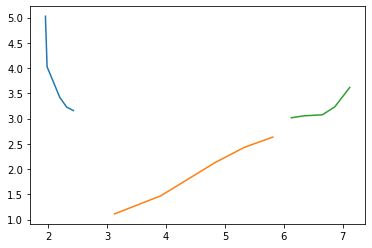

In [19]:
plt.plot(xx, yy) # 特别要注意以此类型数据画图的结果，会自动分为三幅图绘制，每列数据为一组

---------------------------绘图测试终-----------------------------------

## 改进的簇动态分布图

In [20]:
# 绘制中心点移动轨迹的方法是第一次接触，值得记忆
def plotData(X, centroids, idx):
    
    k = len(np.unique(idx)) # 为了legend的正确性做准备
    
    # 建立DataFrame数据结构，存储X及其对应的簇类别
    data = pd.DataFrame(X, columns=['X1', 'X2'])
    data['idx'] = idx
    
    plt.figure(figsize=(10, 6))
    
    # 绘制所有样本数据，不同簇不同颜色
    # 这样可以兼顾颜色的一次性绘制方法虽然简单，但是无法为每个类别分别指明lengend
    plt.scatter(data['X1'], data['X2'], c=data['idx']) 
    
    plt.grid(True)
    plt.xlabel('x1',fontsize=14)
    plt.ylabel('x2',fontsize=14)
    plt.title('Plot of X Points',fontsize=16)

    # 绘制簇中心点的移动轨迹
    xx, yy = [], []
    for centroid in centroids:
        xx.append(centroid[:, 0])
        yy.append(centroid[:, 1])
    
    plt.plot(xx, yy, 'x--', markersize=10) # 会自动分为三幅图绘制
    
    # 绘制legend
    cluster_str = []
    for i in range(k):
        cluster_str.append('Cluster' + str(i))
    plt.legend(cluster_str)
    
    plt.show()

In [21]:
# cluster_str = []
# k = 3
# for i in range(k):
#     cluster_str.append('Cluster' + str(i))
    
# cluster_str

[0. 1. 2.]


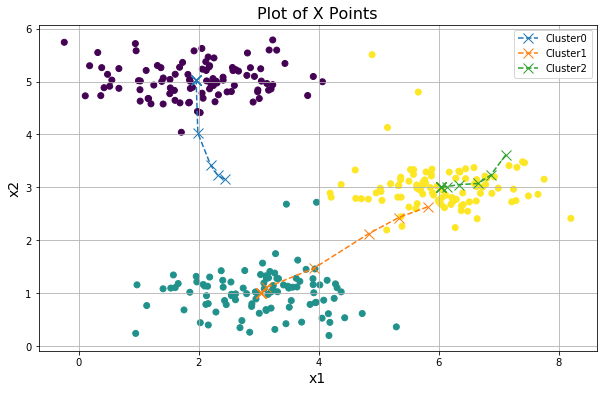

In [22]:
idx, all_centroids = runKmeans(X, initial_centroids, 10)
print(np.unique(idx))
plotData(X, all_centroids, idx)

## 随机初始化 Random initialization
在实践中，对簇中心点进行初始化的一个好的策略就是从训练集中选择随机的例子。

In [23]:
def initCentroids(X, K):
    idx = np.random.choice(X.shape[0], K)
    centroids = X[idx]
    
    return centroids

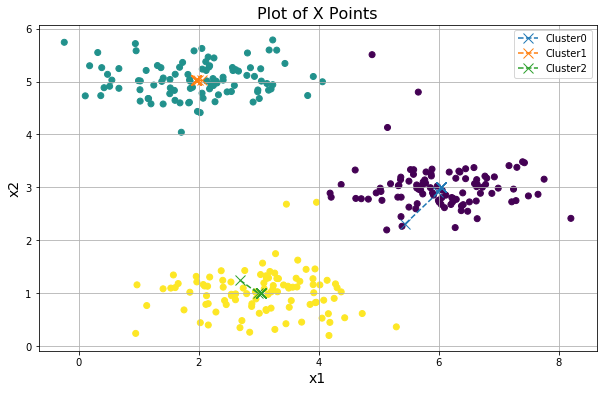

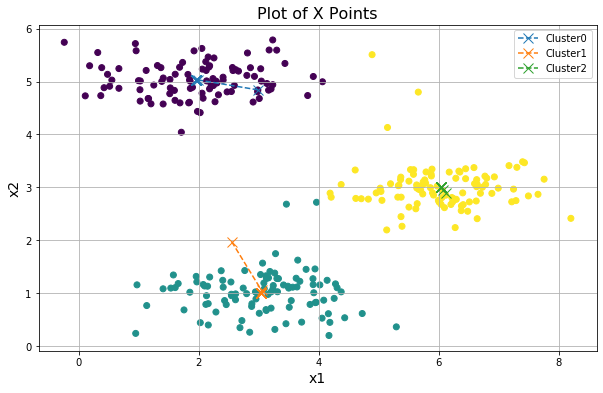

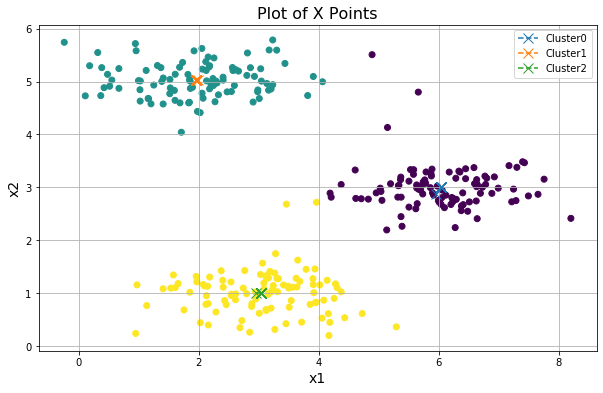

In [24]:
for i in range(3):
    centroids = initCentroids(X, 3)
    idx, all_centroids = runKmeans(X, centroids, 10)
    plotData(X, all_centroids, idx)

进行三次随机初始化，看下各自的效果。会发现第二次的效果并不理想，这是正常的，落入了局部最优。

# Image compression with K-means
这部分你将用Kmeans来进行图片压缩。在一个简单的24位颜色表示图像。每个像素被表示为三个8位无符号整数(从0到255)，指定了红、绿和蓝色的强度值。这种编码通常被称为RGB编码。我们的图像包含数千种颜色，在这一部分的练习中，你将把颜色的数量减少到16种颜色。  

这可以有效地压缩照片。具体地说，您只需要存储16个选中颜色的RGB值，而对于图中的每个像素，现在只需要将该颜色的索引存储在该位置(只需要4 bits就能表示16种可能性)。  

接下来我们要用K-means算法选16种颜色，用于图片压缩。你将把原始图片的每个像素看作一个数据样本，然后利用K-means算法去找分组最好的16种颜色。  

## 读取图像

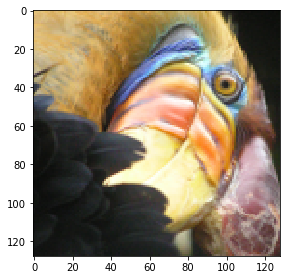

In [25]:
# 读取图像
from skimage import io

A = io.imread('data/bird_small.png')
io.imshow(A)

## 预处理

In [26]:
# 归一化
A = A / 255

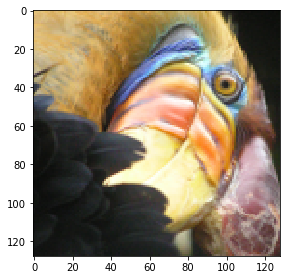

In [27]:
io.imshow(A)

In [28]:
A.shape

(128, 128, 3)

In [29]:
#  Reshape the image into an (N,3) matrix where N = number of pixels.
#  Each row will contain the Red, Green and Blue pixel values
#  This gives us our dataset matrix X that we will use K-Means on.
X = A.reshape(-1, 3) # -1表示自动计算列的值

X.shape

(16384, 3)

In [30]:
X[0]

array([0.85882353, 0.70588235, 0.40392157])

## 执行K-means

In [31]:
K = 16

init_centroids = initCentroids(X, K) # centroidds随机初始化

idx, all_centroids = runKmeans(X, init_centroids, iters=10) # 迭代运行获得数据

In [32]:
np.unique(idx)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15.])

In [33]:
idx

array([1., 8., 8., ..., 7., 6., 6.])

In [34]:
all_centroids[-1] # 最后的中心

array([[0.68799264, 0.62454467, 0.58615458],
       [0.80169871, 0.67030894, 0.42703778],
       [0.4508559 , 0.55229381, 0.76261438],
       [0.6308148 , 0.45731889, 0.2051322 ],
       [0.97814586, 0.9485469 , 0.82141925],
       [0.9646512 , 0.86382314, 0.64578939],
       [0.14935065, 0.15420284, 0.14588745],
       [0.25764821, 0.23650785, 0.23164141],
       [0.89553961, 0.73632712, 0.47421648],
       [0.79309489, 0.76049383, 0.77461874],
       [0.4003616 , 0.3666412 , 0.37266616],
       [0.56556837, 0.47935334, 0.44331145],
       [0.87576268, 0.57897073, 0.25806506],
       [0.70580703, 0.57477844, 0.34824132],
       [0.44281132, 0.31943194, 0.19667339],
       [0.08161509, 0.08841703, 0.07808294]])

In [35]:
all_centroids[-1][0,:]

array([0.68799264, 0.62454467, 0.58615458])

In [36]:
idx

array([1., 8., 8., ..., 7., 6., 6.])

In [37]:
idx == 12

array([False, False, False, ..., False, False, False])

In [38]:
all_centroids[-1][int(idx[0]), :]

array([0.80169871, 0.67030894, 0.42703778])

## 绘制结果图

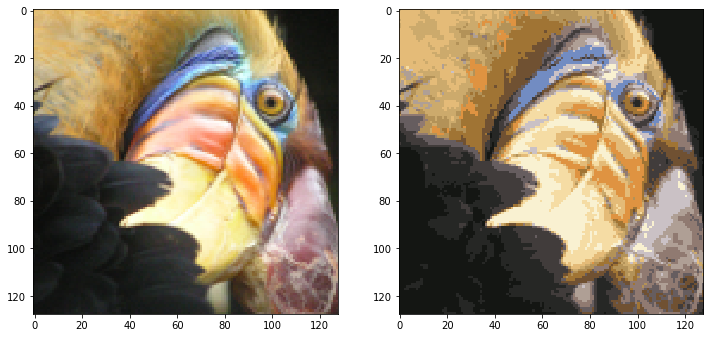

In [39]:
# 重构出新的图像数据
img = np.ones(X.shape)
centroids = all_centroids[-1] # 最后的中心

# 方式一：遍历img的每行，16384次循环，效率低
for i in range(len(img)):
    img[i] = centroids[int(idx[i]), :]

# 方式二：类似于DataFrame结构的标签索引，仅循环16次，效率高
# for i in range(len(centroids)):
#     img[idx == i] = centroids[i]

img = img.reshape((128, 128, 3))

fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].imshow(A)
axes[1].imshow(img)
plt.show()

----------------------------方式二的解释：（启）------------------------------------  
学习到了array类型一种新的切片方式，可以利用另一个array的布尔值来筛选其中的元素

In [40]:
a = np.arange(9)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [41]:
b = np.array([1,1,1,2,2,2,3,3,3])
b

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

In [42]:
b==1

array([ True,  True,  True, False, False, False, False, False, False])

In [43]:
a[b==1]

array([0, 1, 2])

----------------------------方式二的解释：（终）------------------------------------

## 保存图像

In [44]:
# 保存图像
import matplotlib
 
matplotlib.image.imsave('data/bird_small2.png', img)

可见图像大小减小为1/3
![](https://img.arctee.cn/202121271145-o.png)

## Use your own image

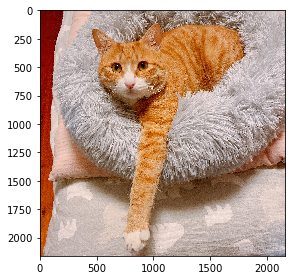

In [45]:
# 读取图像数据
img_org = io.imread('data/cat.jpg')
# 归一化
img_org = img_org / 255
# 图像显示
io.imshow(img_org)

In [ ]:
%%time
X_c = img_org.reshape(-1, 3)

K = 16

init_centroids = initCentroids(X_c, K) # centroidds随机初始化

idx, all_centroids = runKmeans(X_c, init_centroids, iters=10) # 迭代运行获得数据

# 重构出新的图像数据
img = np.ones(X_c.shape)
centroids = all_centroids[-1] # 最后的中心

for i in range(len(centroids)):
    img[idx == i] = centroids[i]

img_c = img.reshape((128, 128, 3))

fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].imshow(img_org)
axes[1].imshow(img_c)
plt.show()  

# 用时太长，谨慎运行

In [ ]:
# 保存图像 
matplotlib.image.imsave('data/cat2.jpg', img_c)